In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

df = pd.read_csv('data.csv')
df.head()

,REGION,Region,LOCATION,Country,INC,Income,VAR,Variable,TIME,Year,Value,Flag Codes,Flags
0,ASI,Asia,AUS,Australia,HIN,High income,DF_HR_LAW,Law,2019,2019,0.50,NaN,NaN
1,ASI,Asia,AUS,Australia,HIN,High income,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asia,AUS,Australia,HIN,High income,DF_HR_PRACT,Practice,2019,2019,1.82,NaN,NaN
3,ASI,Asia,AUS,Australia,HIN,High income,DF_DV_LAW,Law,2019,2019,0.00,NaN,NaN
4,ASI,Asia,AUS,Australia,HIN,High income,DF_IN_LAW,Law,2019,2019,0.00,NaN,NaN


In [2]:
print(df.shape)

(19676, 13)


El dataset té 19676 files i 13 columnes

In [3]:
print(df.columns)
print(df.info())

Index(['REGION', 'Region', 'LOCATION', 'Country', 'INC', 'Income', 'VAR',
       'Variable', 'TIME', 'Year', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19676 entries, 0 to 19675
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REGION      19676 non-null  object 
 1   Region      19676 non-null  object 
 2   LOCATION    19676 non-null  object 
 3   Country     19676 non-null  object 
 4   INC         19676 non-null  object 
 5   Income      19676 non-null  object 
 6   VAR         19676 non-null  object 
 7   Variable    19676 non-null  object 
 8   TIME        19676 non-null  int64  
 9   Year        19676 non-null  int64  
 10  Value       19676 non-null  float64
 11  Flag Codes  0 non-null      float64
 12  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.0+ MB
None


Les columnes categòriques són tipus object. Seguidament tenim els camps de TIME/Year, que són numèrics, i els camps Value/Flag Codes/Flags que són float.
Al head hem pogut veure que Flag Codes i Flags tenen valors nulls. Mirarem quantes fileres tenen valors nuls, per poder fer un tractament.

In [4]:
print("El total de nuls a Flag Codes és {}".format(df['Flag Codes'].isna().sum()))
print("El total de nuls a Flags és {}".format(df['Flags'].isna().sum()))

El total de nuls a Flag Codes és 19676
El total de nuls a Flags és 19676


Veiem que totes les columnes estan en blanc, així que les podem eliminar. També hem vist que hi ha valors repetitius, com el cas de REGION/Region, Location/Country i INC/Income. Deixarem només les columnes més descriptives.

In [6]:
df.drop(['REGION', 'LOCATION', 'INC', 'Variable', 'TIME', 'Year', 'Flag Codes', 'Flags'], axis='columns', inplace=True)

In [7]:
df.head()

,Region,Country,Income,VAR,Value
0,Asia,Australia,High income,DF_HR_LAW,0.50
1,Asia,Australia,High income,DF_HR_ATT,21.10
2,Asia,Australia,High income,DF_HR_PRACT,1.82
3,Asia,Australia,High income,DF_DV_LAW,0.00
4,Asia,Australia,High income,DF_IN_LAW,0.00


Un cop tenim les dades que ens interessen, farem un estudi de la seva distribució:

In [8]:
print("Recompte per regions:\n{}\n".format(df['Region'].value_counts()))
print("Recompte per països:\n{}\n".format(df['Country'].value_counts()))
print("Recompte per income:\n{}\n".format(df['Income'].value_counts()))
print("Recompte per variables:\n{}\n".format(df['VAR'].value_counts()))

Recompte per regions:
All regions    9838
Africa         2952
Asia           2944
Europe         2298
Americas       1644
Name: Region, dtype: int64

Recompte per països:
Nigeria                132
Ghana                  128
Tanzania               128
Ethiopia               128
Mali                   128
                      ... 
Guyana                  80
Brunei Darussalam       76
Antigua and Barbuda     76
Grenada                 76
Dominica                68
Name: Country, Length: 180, dtype: int64

Recompte per income:
All income groups       9838
High income             3018
Upper middle income     2580
Lower middle income     2388
Low income              1852
Name: Income, dtype: int64

Recompte per variables:
RPI_VAW_LAW         720
RCL_AJ_LAW          720
RCL_CR_LAW          720
RPI_RA_LAW          720
RAPFR_WR_LAW        720
RCL_FM_LAW          720
RAPFR_SAL_LAW       720
RCL_PV_LAW          720
DF_CM_PRACT         720
DF_HR_LAW           720
RPI_FGM_LAW         720
RAPFR_SA

Podem observar que hi ha files amb valors redundants. Les files amb valors "All regions" i "All income groups" semblen contenir els mateixos valors que a nivell individual, però agrupats. Eliminarem les files amb aquests valors:

In [31]:
df = df[df.Region != "All regions"]
df = df[df.Income != "All income groups"]
df.shape

(4919, 5)

Com el valor del dataset depen de la variable, farem un estudi per a cadascuna d'elles:

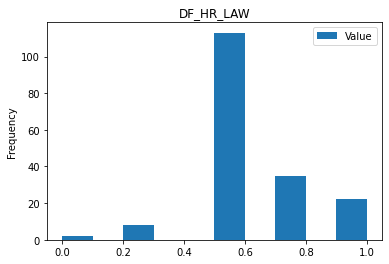

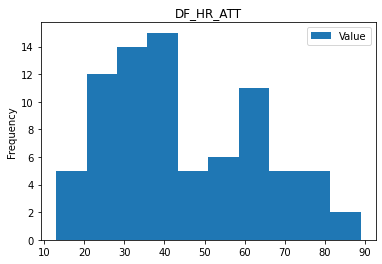

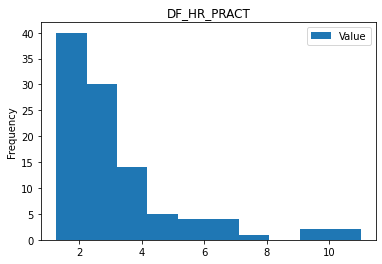

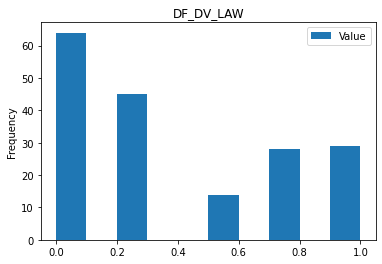

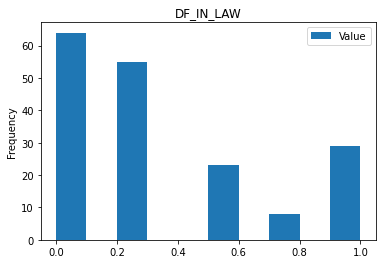

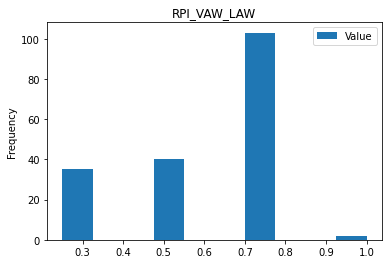

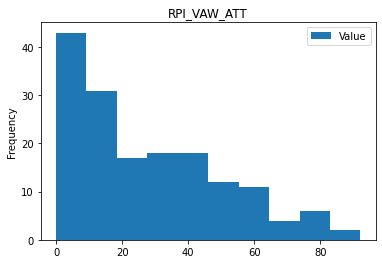

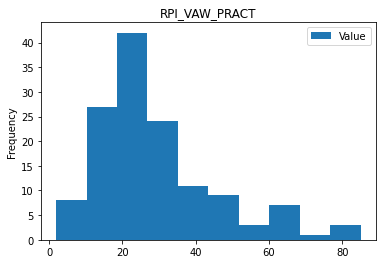

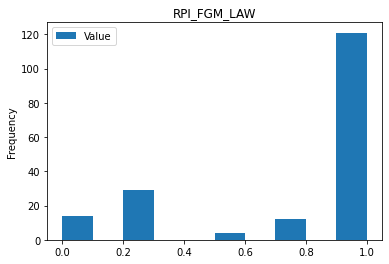

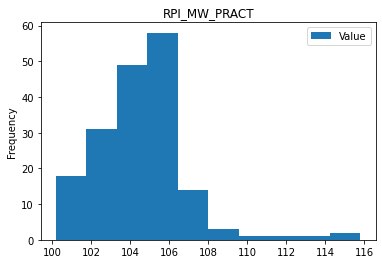

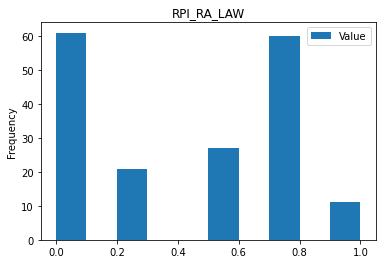

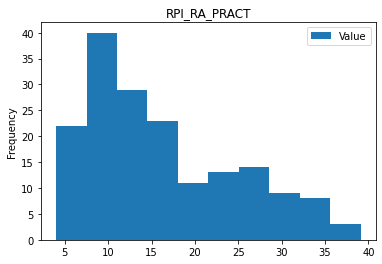

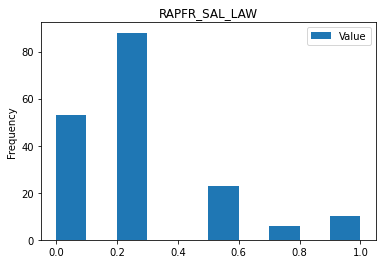

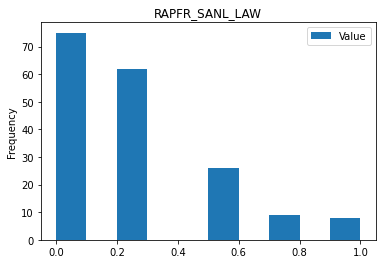

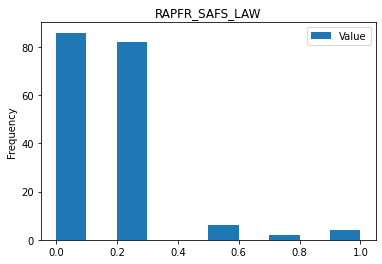

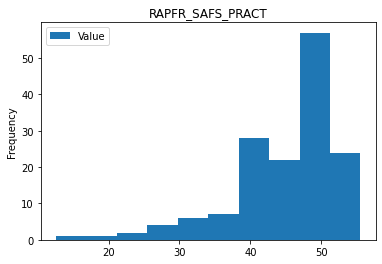

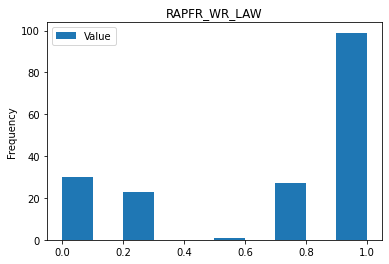

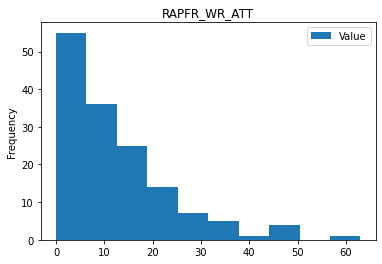

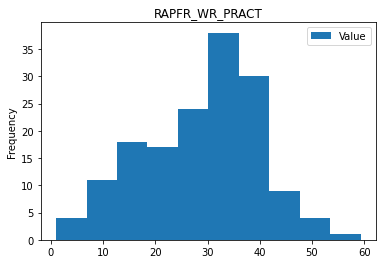

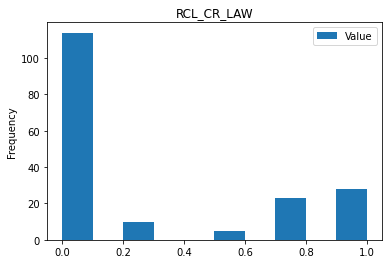

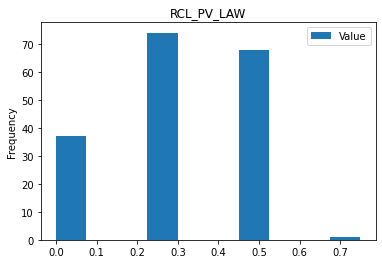

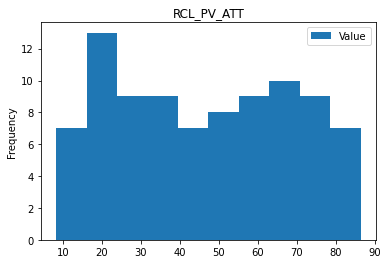

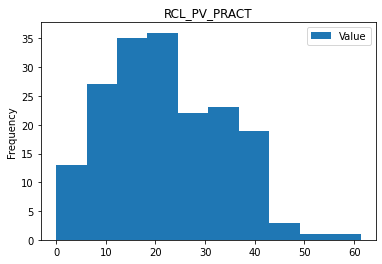

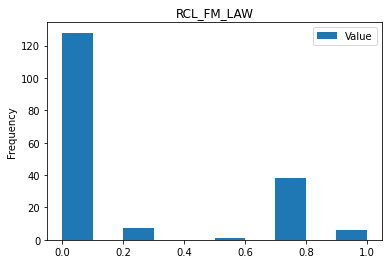

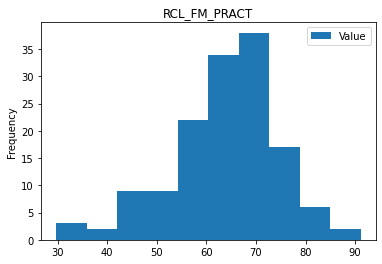

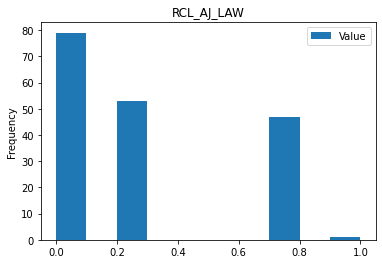

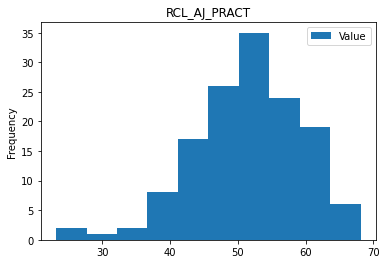

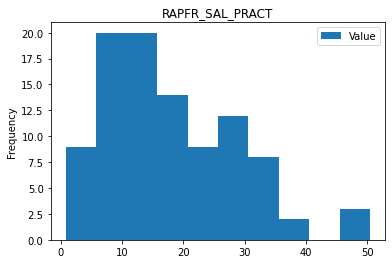

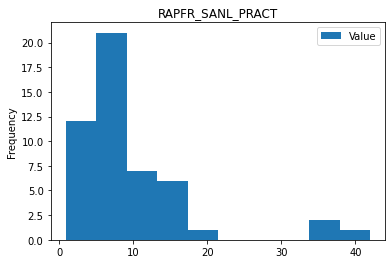

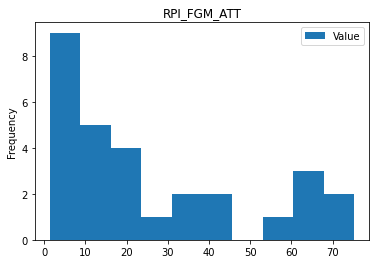

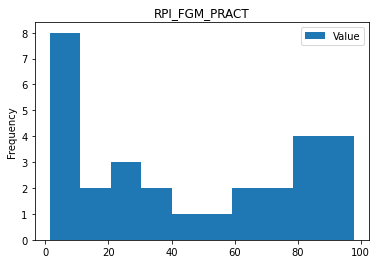

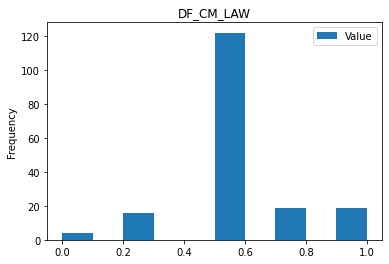

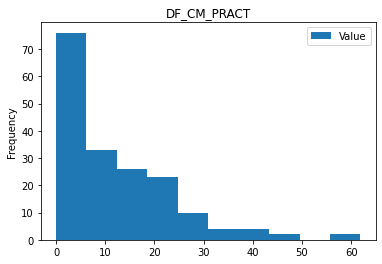

In [32]:
for i in df['VAR'].unique():
    group = df[df.VAR == i]
    group.plot.hist(group['Value'], title=i)
    

Observem que les variables tenen distribucions molt diferents entre elles. Algunes tenen valors categòrics entre 0-1, i altres són percentatges. Algunes variables tenen distribucions normals, mentre que d'altres semblen bastant esbiaixades.
Com a conclusió, la visualització que fem no podrà agrupar aquestes variables en una mateixa gràfica, sino que haurà d'exposar els diferents punts per separat, mirant de trobar un nexe comú.

Finalment guardarem un csv amb les dades ja processades, per un millor tractament:

In [29]:
df.to_csv("./final_data.csv", header=True, index=False)